In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 讀取資料
df = pd.read_csv("report_data/ai-performance-knowledge-tests-vs-training-computation.csv")

# 欄位名稱與資料型態
print(df.info())

print("###########################################")

# 每個欄位的空值數量
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           25 non-null     object 
 1   Year                             25 non-null     int64  
 2   MMLU avg                         25 non-null     float64
 3   Training computation (petaFLOP)  25 non-null     int64  
 4   Organization                     25 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB
None
###########################################
Entity                             0
Year                               0
MMLU avg                           0
Training computation (petaFLOP)    0
Organization                       0
dtype: int64


In [72]:
# 掃描整個 DataFrame 的空值
# df = pd.read_csv("report_data/forTest.csv")

fully_empty_cols = []   # 紀錄整欄為空的欄位
has_null = False        # 用來判斷是否曾出現任何空值

for row_idx, row in df.iterrows():
    for col in df.columns:
        # 已確認是整欄為空的欄位就略過
        if col in fully_empty_cols:
            continue
        if pd.isna(row[col]):
            has_null = True
            # 判斷是否整欄為空
            if df[col].isna().all():
                fully_empty_cols.append(col)
                print(f"整欄為空 : '{col}'")
            else:
                print(f"空值 : {col}，第{row_idx}行")

if not has_null:
    print("沒有空值")


沒有空值


In [73]:
df = df.drop(columns=fully_empty_cols)

In [74]:
# 確保 Year 是整數
df["Year"] = df["Year"].astype(int)

# 確保數值欄位是 float
df["MMLU avg"] = df["MMLU avg"].astype(float)
df["Training computation (petaFLOP)"] = df["Training computation (petaFLOP)"].astype(float)


In [75]:
yearly_avg = (df.groupby("Year")[["MMLU avg", "Training computation (petaFLOP)"]].mean().reset_index())

print(yearly_avg)

   Year   MMLU avg  Training computation (petaFLOP)
0  2019  32.400000                     3.600000e+04
1  2020  43.900000                     3.930000e+08
2  2021  35.625000                     1.300178e+08
3  2022  51.856364                     9.110545e+08
4  2023  61.380000                     1.378890e+10


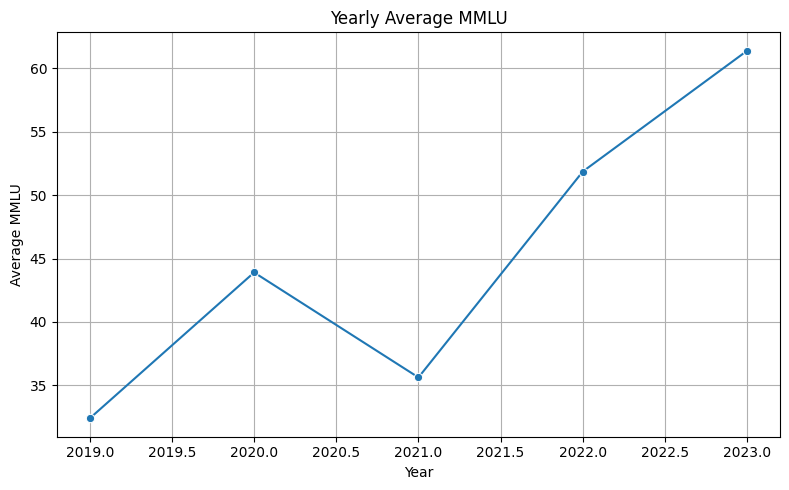

In [76]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=yearly_avg,
    x="Year",
    y="MMLU avg",
    marker="o"
)

plt.title("Yearly Average MMLU")
plt.xlabel("Year")
plt.ylabel("Average MMLU")
plt.grid(True)
plt.tight_layout()
plt.savefig("Yearly_Average_MMLU.png", dpi=300)
plt.show()

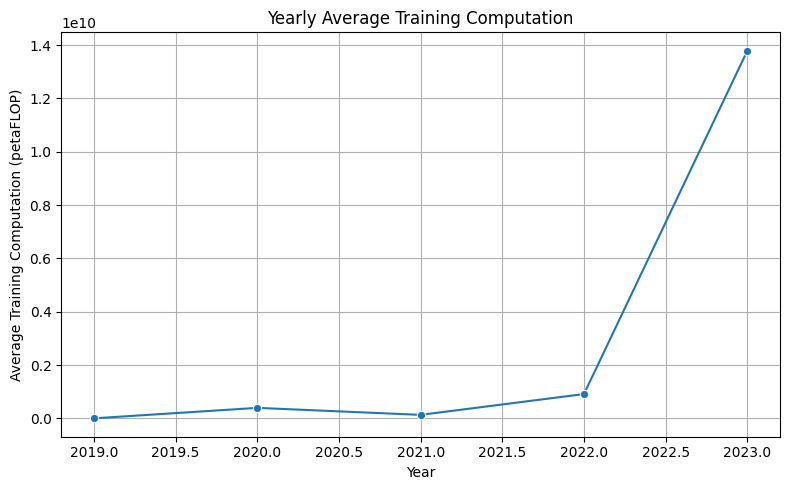

In [77]:
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=yearly_avg,
    x="Year",
    y="Training computation (petaFLOP)",
    marker="o"
)

plt.title("Yearly Average Training Computation")
plt.xlabel("Year")
plt.ylabel("Average Training Computation (petaFLOP)")
plt.grid(True)
plt.tight_layout()
plt.savefig("Yearly_Average_Training_Computation.png", dpi=300)
plt.show()


In [78]:
org_counts = df["Organization"].value_counts()

valid_orgs = org_counts[org_counts >= 2].index

df_org = df[df["Organization"].isin(valid_orgs)]


In [85]:
org_avg = (
    df
    .groupby("Organization", as_index=False)
    .agg({
        "MMLU avg": "mean",
        "Training computation (petaFLOP)": "mean"
    })
)

org_avg_mmlu = org_avg.sort_values(
    by="MMLU avg",
    ascending=False
)

org_avg_compute = org_avg.sort_values(
    by="Training computation (petaFLOP)",
    ascending=False
)

print(org_avg)


              Organization   MMLU avg  Training computation (petaFLOP)
0                Bloomberg  39.180000                     2.120000e+08
1                 Eleuther  33.600000                     2.120000e+07
2          Google DeepMind  48.993333                     1.351801e+10
3          Google Research  57.880000                     2.303280e+09
4  HuggingFace, BigScience  39.130000                     4.120000e+08
5                  Meta AI  47.838000                     2.222400e+08
6                   OpenAI  60.200000                     5.310607e+09
7             Tsinghua KEG  44.800000                     3.120000e+08


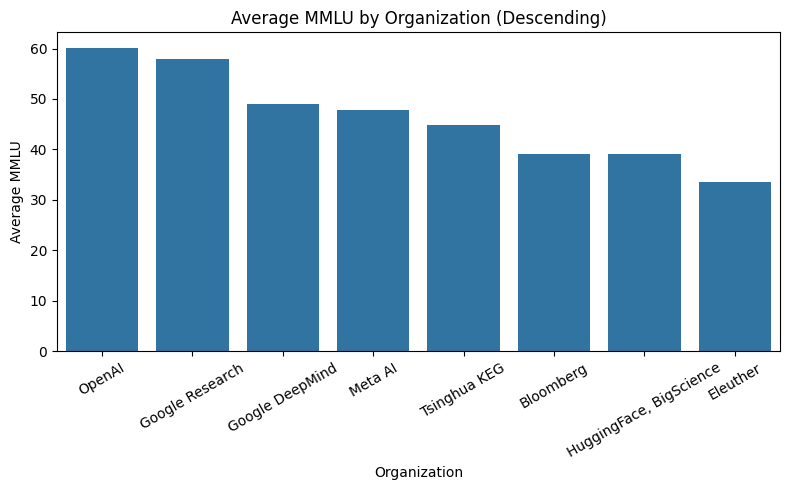

In [86]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=org_avg_mmlu,
    x="Organization",
    y="MMLU avg"
)

plt.title("Average MMLU by Organization (Descending)")
plt.xlabel("Organization")
plt.ylabel("Average MMLU")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("Average_MMLU_by_Organization.png", dpi=300)
plt.show()


In [ ]:
import numpy as np

df["log10_compute"] = np.log10(df["Training computation (petaFLOP)"])

df["Efficiency_log"] = df["MMLU avg"] / df["log10_compute"]

org_counts = df["Organization"].value_counts()
valid_orgs = org_counts[org_counts >= 2].index
df_org = df[df["Organization"].isin(valid_orgs)].copy()

org_log_compute = (
    df
    .groupby("Organization", as_index=False)["log10_compute"]
    .mean()
    .sort_values("log10_compute", ascending=False)
)

print(org_log_compute)

              Organization  log10_compute
3          Google Research       8.810364
4  HuggingFace, BigScience       8.614897
7             Tsinghua KEG       8.494155
6                   OpenAI       8.459231
0                Bloomberg       8.326336
5                  Meta AI       8.181358
2          Google DeepMind       7.959858
1                 Eleuther       7.326336


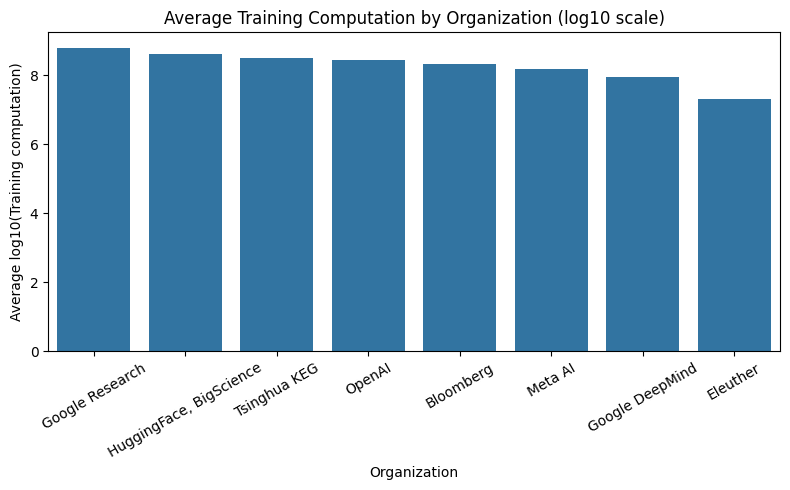

In [82]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=org_log_compute,
    x="Organization",
    y="log10_compute"
)

plt.title("Average Training Computation by Organization (log10 scale)")
plt.xlabel("Organization")
plt.ylabel("Average log10(Training computation)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("Average_Training_Computation_by_Organization.png", dpi=300)
plt.show()


In [83]:
df["Efficiency_log"] = df["MMLU avg"] / df["log10_compute"]

df[[
    "Entity",
    "MMLU avg",
    "Training computation (petaFLOP)",
    "Efficiency_log"
]]


,Entity,MMLU avg,Training computation (petaFLOP),Efficiency_log
0,BLOOM,39.13,4.120000e+08,4.542132
1,BloombergGPT,39.18,2.120000e+08,4.705551
2,Chinchilla,67.50,5.880000e+08,7.697240
3,GLM-130B,44.80,3.120000e+08,5.274215
4,GPT-2 (finetuned),32.40,3.600000e+04,7.111029
5,GPT-3 (davinci),43.90,3.930000e+08,5.107982
6,GPT-3.5,70.00,2.580000e+09,7.437615
7,GPT-4,86.40,2.100000e+10,8.370293
8,GPT-NeoX-20B,33.60,2.120000e+07,4.586194
9,Gemini Ultra,83.96,8.000000e+10,7.700569


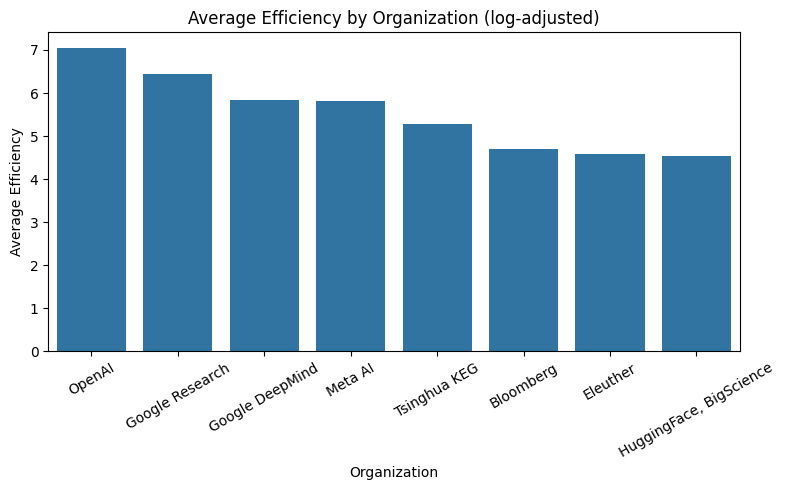

In [87]:
org_eff_log = (
    df
    .groupby("Organization", as_index=False)["Efficiency_log"]
    .mean()
    .sort_values("Efficiency_log", ascending=False)
)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=org_eff_log,
    x="Organization",
    y="Efficiency_log"
)

plt.title("Average Efficiency by Organization (log-adjusted)")
plt.xlabel("Organization")
plt.ylabel("Average Efficiency")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig("Average_Efficiency_by_Organization.png", dpi=300)
plt.show()
